# Project: Investigate a Dataset (TMDb Movie Dataset)

## Table of Contents
- Introduction
- Data Wrangling
- Exploratory Data Analysis
- Conclusions

## Introduction

## Overview
To complete my Data Analysis project I am using TMDb movies dataset.

This data set contains information about 10 thousand movies collected from The Movie Database (TMDb), including user ratings and revenue. It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.

### Question that can analyised from this data set
- We want to know that if the movie rate increase along the time?
- What is the most popular production companies
- What is the most popular release year ?
- What's the relation between revenue and budget ?
- What's the relation between vote counts and Budget ?
- what's the relation between release year and vote count ?
- what's the relation between revenue and vote counts ?

## import libiraries

In [125]:
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Following our study of the dataset and provided questions, we will maintain only relevant data and exclude irrelevant data in order to make our calculations simple and understandable.

## General Properties

In [126]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

#loading the csv file and storing it in the variable "tmbd_data"
file = pd.read_csv('tmdb-movies.csv')

#printing first five rows with defined columns of tmdb-movies database
file.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Obsevations from the data set
- There is no mention of a currency unit in the dataset. As a result, I'll utilise the dollar in my study because it's the most widely used international currency.
- Because each movie's vote_count is different, we can't determine the popularity of the films simply on the average vote count.

## Data Cleaning (We remove the unused information from the dataset )

### The Important observation we will get 

- We will remove unused column like id, imdb_id, keywords, homepage etc.
- Removing the dublications 
- Some movies in the database have zero budget or zero revenue, that is there value has not been recorded so we will be    discarding such entries
- Converting (release date) column into (date format)
- We replace zero with NAN in runtime column.
- We will change format of budget and revenue column.

### Removing Unused columns

In [127]:
#creating a list of column to be deleted
deleted_col=[ 'id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'vote_average']

#deleting the columns
file= file.drop(deleted_col,1)

#previewing the new dataset
file.head(4)

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,2015


### Removing the duplications



In [128]:
rows, col = file.shape
#We need to reduce the count of row by one as contain header row also.
print('The total num entries of movies {} and {} The num of columns in it.'.format(rows-1, col))

The total num entries of movies 10865 and 13 The num of columns in it.


In [129]:
file.drop_duplicates(keep ='first', inplace=True)
rows, col = file.shape

print('The total num entries of movies {} and {} The num of columns in it.'.format(rows-1, col))

The total num entries of movies 10864 and 13 The num of columns in it.


### So there was a duplicate row and it has been removed now.

### Removing Zero's from budget and revenue columns

In [130]:
# creating a seperate list of revenue and budget column
temp_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
file[temp_list] = file[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
file.dropna(subset = temp_list, inplace = True)

rows, col = file.shape
print('After removing zero entries, we have only {} num of movies.'.format(rows-1))

After removing zero entries, we have only 3853 num of movies.


 ### Converting (release date) column into (date format)

In [131]:
file['release_date'] = pd.to_datetime(file['release_date'])


In [132]:
# printing the changed dataset
tmdb_data.head(5)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


### Replacing zero with NAN in runtime column

In [133]:
#replacing zero with NaN in runtime column in the dataset
file.runtime =file.runtime.replace(0, np.NAN)

### Changing format of budget and revenue column

- Checking the current format of columns in the dataset

In [134]:
#printing the data type of the data 
file.dtypes

popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
tagline                         object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
release_year                     int64
dtype: object

In [135]:
convert_type=['budget', 'revenue']
#Converting data type
file[convert_type]=file[convert_type].applymap(np.int64)
#printing the changed data 
file.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
tagline                         object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
release_year                     int64
dtype: object

# Exploratory Data Analysis

## Questions 

### 1) We want to know that if the movie rate increase along the time?

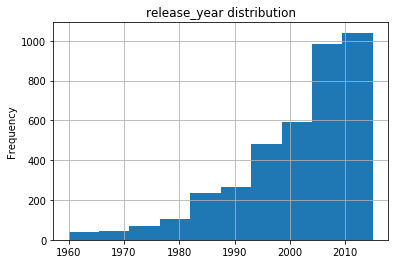

In [136]:
file.release_year.plot(kind='hist',label='release_year',title='release_year distribution',grid=True);

### 2) What is the most popular production companies

In [176]:
file.production_companies.mode()

0    Paramount Pictures
dtype: object

### 3) What is the most popular release year ?

In [138]:
file.release_year.mode()


0    2011
dtype: int64

### 4)Which Genre Has The Highest Release Of Movies?

In [166]:
#Function to split the string and return the count of each genre in the data
def data(x):
    #Here we concatenate the all rows of the genrs.
    genres_data = file[x].str.cat(sep = '|')
    data = pd.Series(genres_data.split('|'))
    #count each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

In [168]:

Num_of_genres_movies = data('genres')
print(Num_of_genres_movies)

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64


Text(0, 0.5, 'Genres')

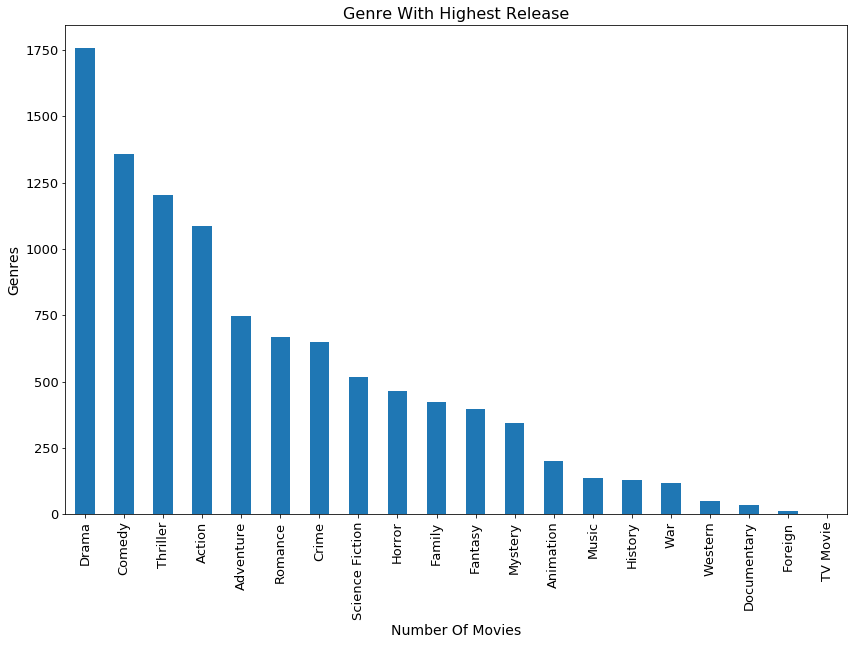

In [177]:
# plot function for 'genre vs number of movies'( bar plot ) 
Num_of_genres_movies.plot(kind= 'bar',figsize = (14,9),fontsize=13)
plt.title("Genre With Highest Release",fontsize=16)
plt.xlabel('Number Of Movies',fontsize=14)
plt.ylabel("Genres",fontsize= 14)

### Conclusion
- From observation we found that Drama(4761) genre has the highest release of movies followed by Comedy(3793) and Thriller(2908).

# EDA

### We want to see the relations between all columns in the data set in a whole graph to see the data more clearly

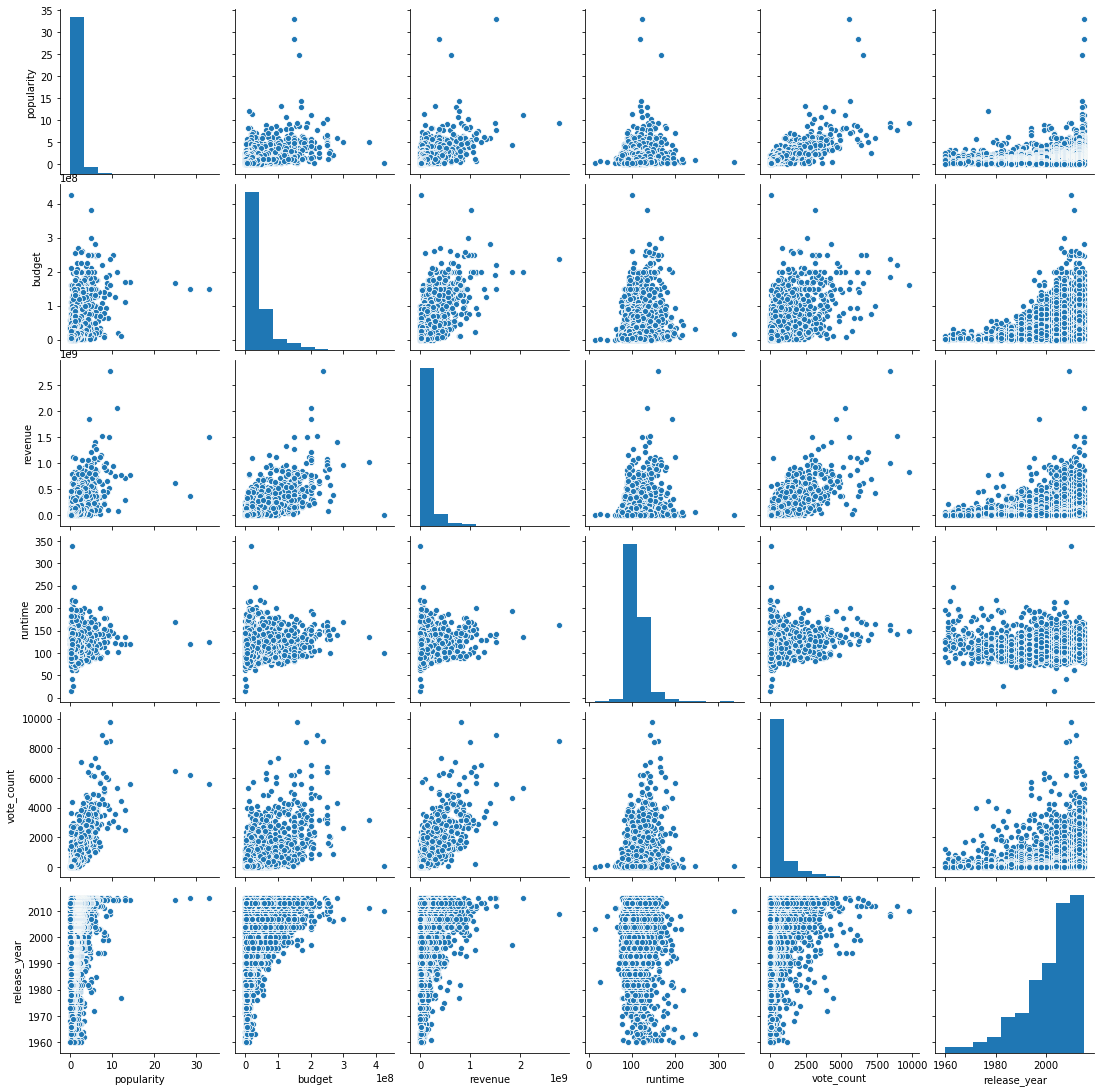

In [139]:
sns.pairplot(file)

### We want to see how does each column values change ? 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C5445B51C8>,
      dtype=object)

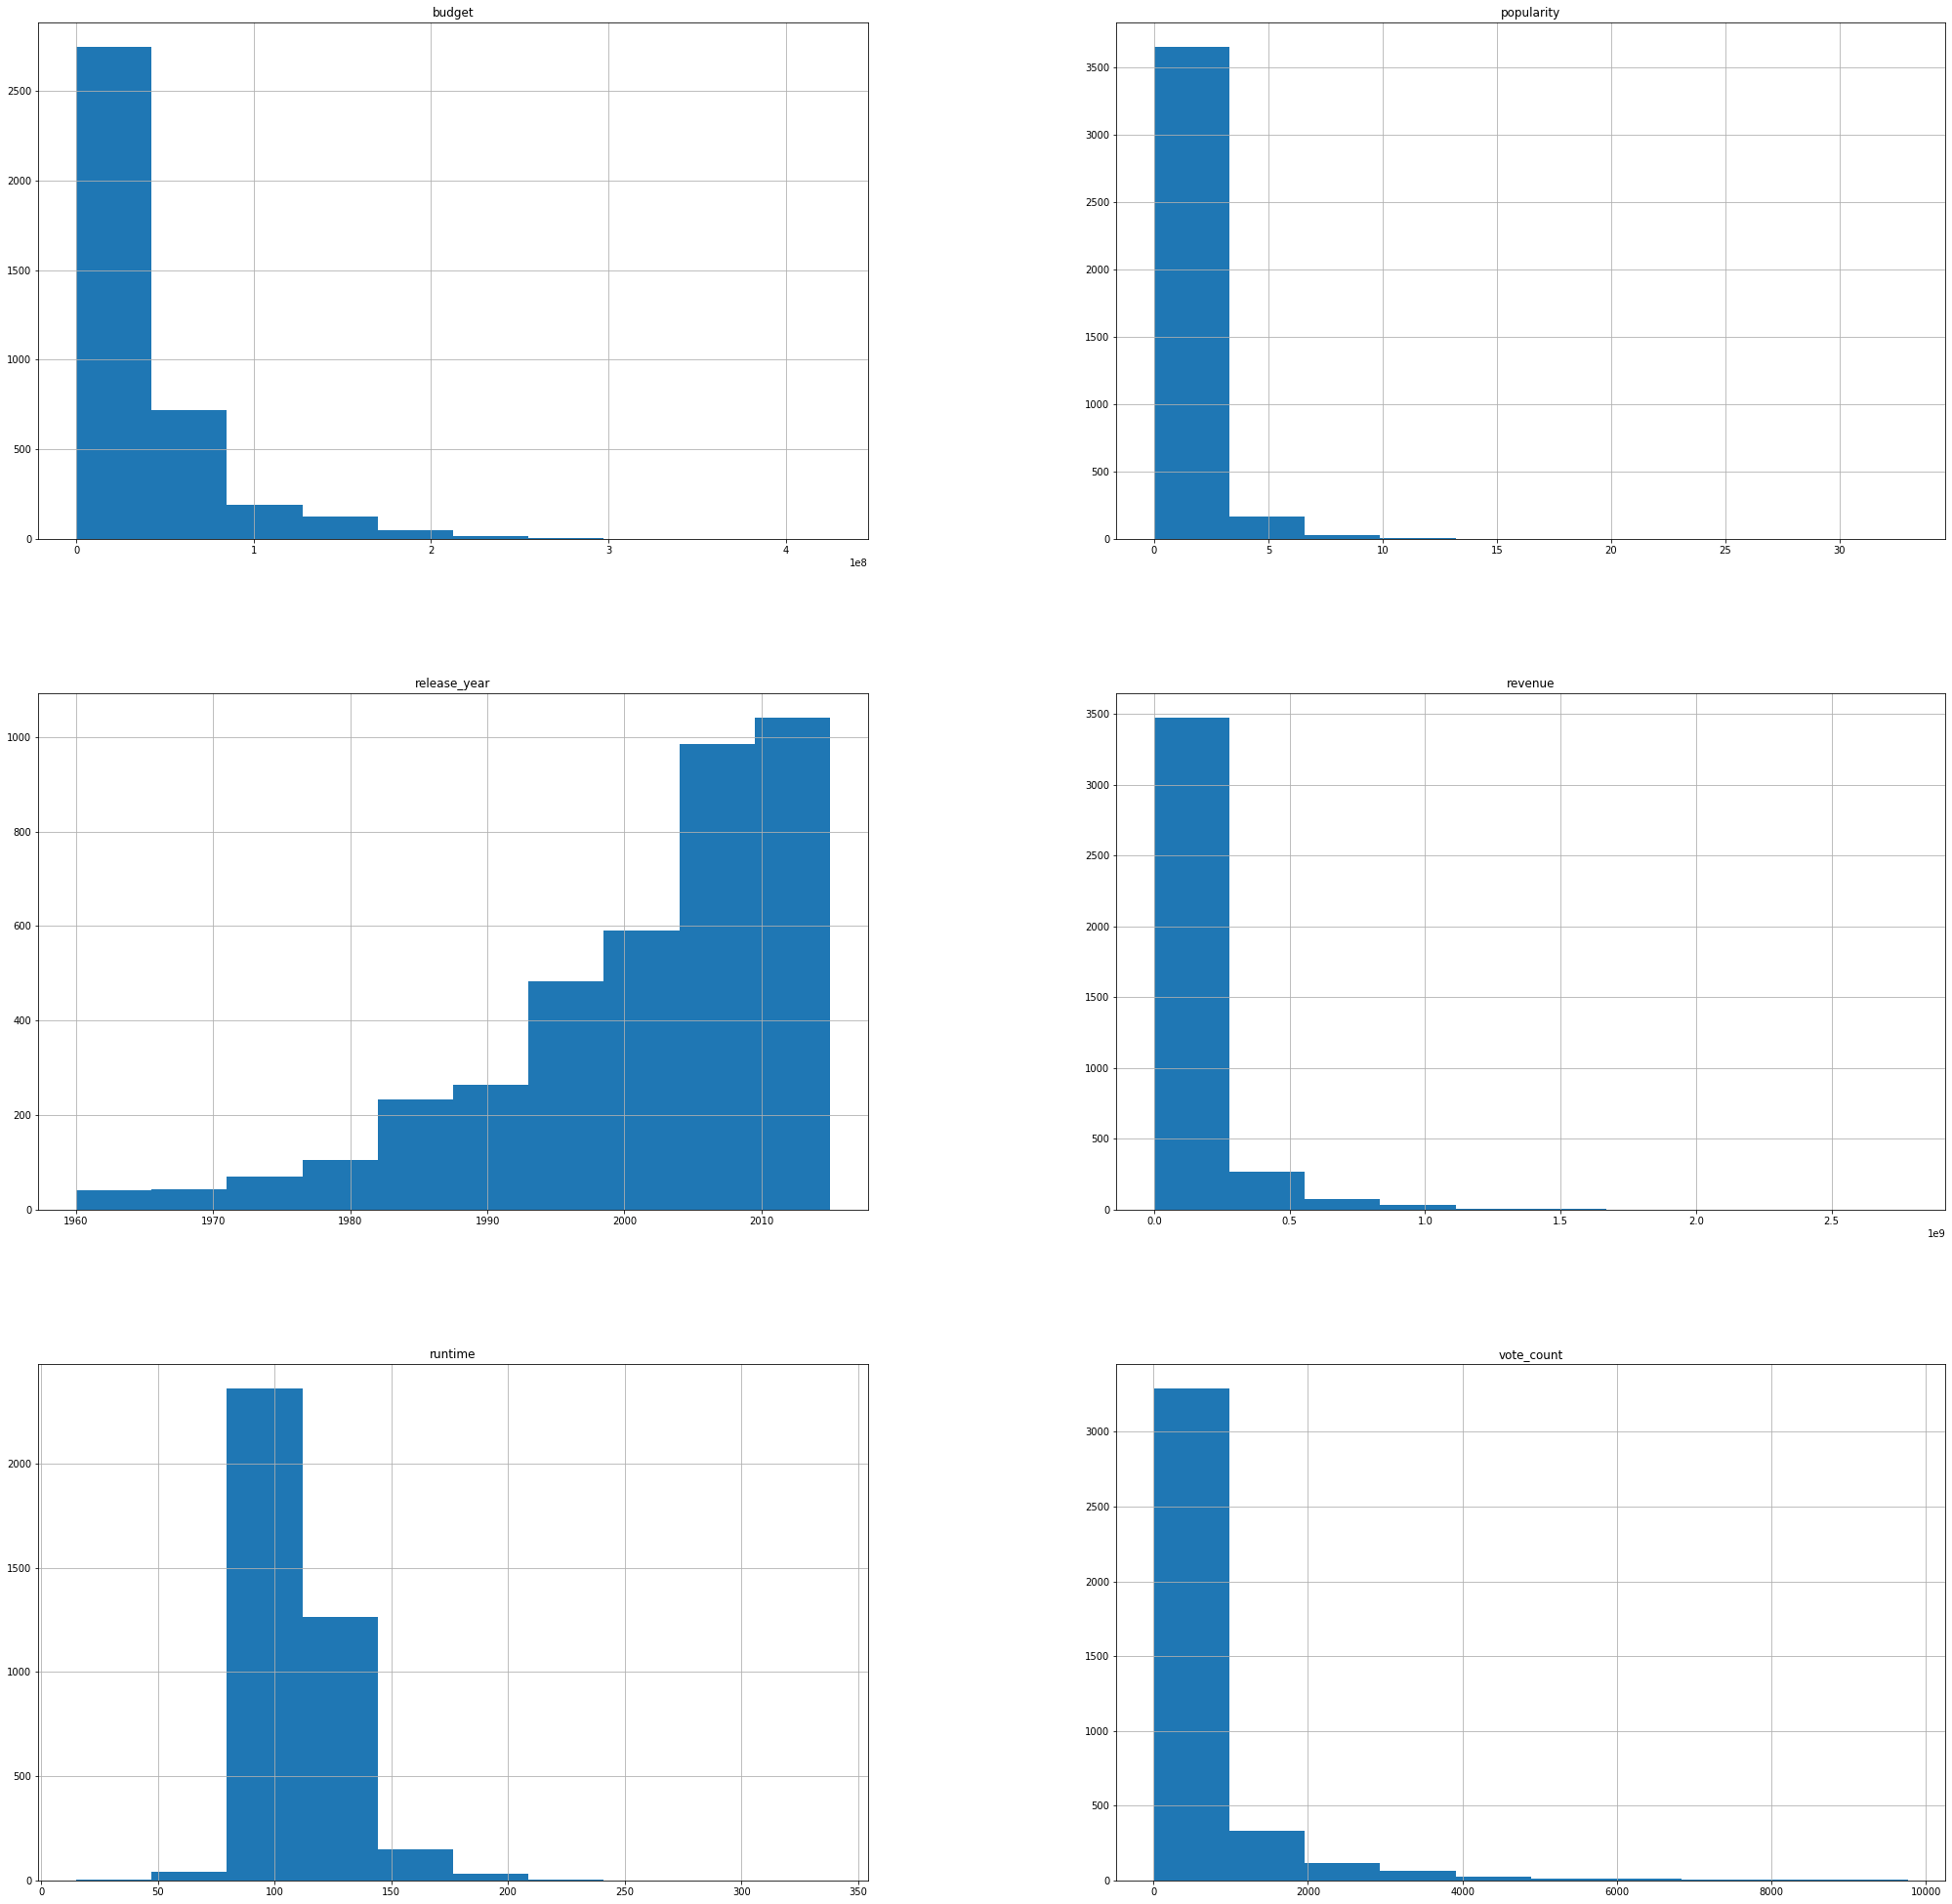

In [174]:
file.hist(figsize = (35,35))

## Conclusion
### From the above plots :-

There are more than 8000 movies have very high budget. And if the bidget decreases, the number of movies decreases (Positive relationship).

There are more than 10000 movies have very high revenue. And if the bidget decreases, the number of movies decreases, less than 2000 movies have less revenue (Positive relationship).

Most of films have high popularity (more than 10000), and very low percentage of movies that have little popularity.

there are a positive correlation between the release year and number of frequency, if the number of years increases , the number of movies increases.

In [180]:
# We make a function to prevent repetitive code many times 
def scatterplot(X,Y,Xlabel,Ylabel,Title) : 
    x = X
    y = Y
    plt.figure(figsize=(12,7))
    plt.title(Title)
    plt.xlabel(Xlabel)
    plt.ylabel(Ylabel)
    plt.scatter(x,y, marker='o',color='black')
    return 
    

### What's the relation between vote counts and Budget ?

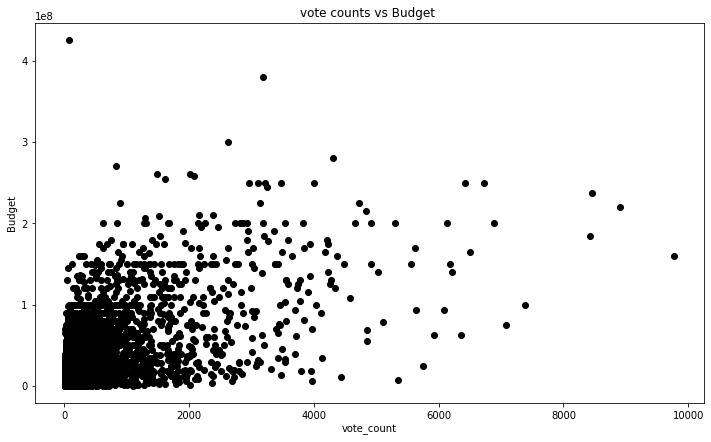

In [184]:
scatterplot(file.vote_count,file.budget,'vote_count','Budget','vote counts vs Budget ')

Conclusion : 
Many movies that have low vote counts , are made by low budget and the opposite is wright (Positive relationship)

### what's the relation between revenue and vote counts ?

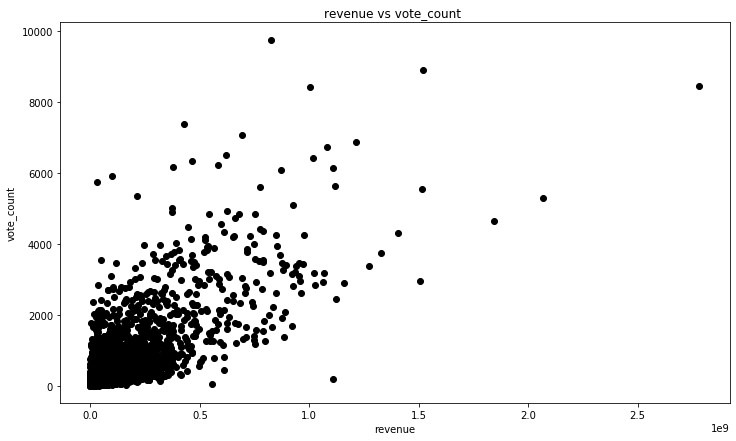

In [186]:
scatterplot(file.revenue,file.vote_count,'revenue','vote_count','revenue vs vote_count ')

Conclusion:

Most of films that have low revenue have a low votes, And movies with high revenue have high average.

### what's the relation between release year and vote count ?

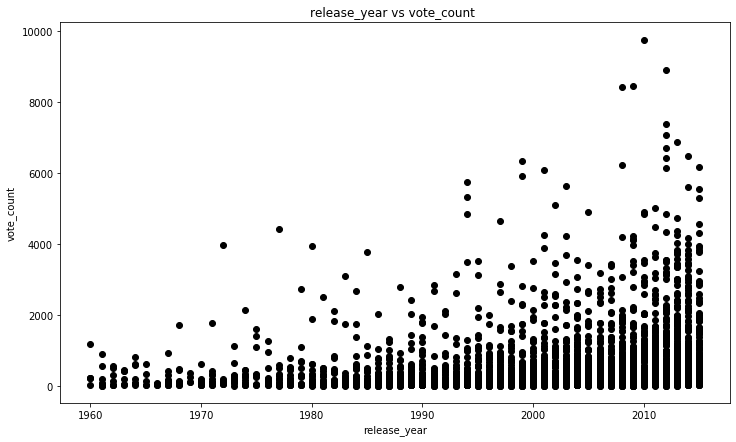

In [189]:
scatterplot(file.release_year,file.vote_count,'release_year','vote_count','release_year vs vote_count ')

Conclusion:

Older movies have low vote counts that the new movies that have more vote counts.

### what's the relation between revenue and budget?

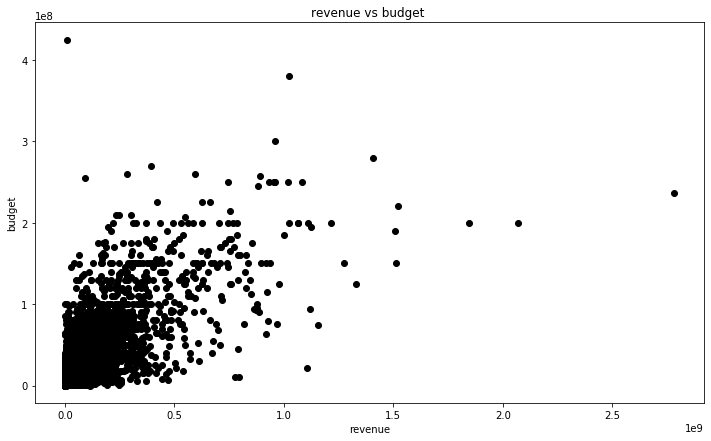

In [191]:
scatterplot(file.revenue,file.budget,'revenue','budget','revenue vs budget ')

Conclusion:

there are a positive relashionship between revenue and budget

# Conclusions

- There is a positive correlation between budget and popularity so that more budget will cause more revenue
- Observation result denote that the number of movies is increasing with time increasing
- We found that Paramount Pictures is the most popular production companies
- We notice that 2011 is the most popular release year
- Drame, Comedy, Thriller and Action are four most-made genres.
- We discover that if the bidget decreases, the number of movies decreases (Positive relationship).
- There are a positive correlation between the release year and number of frequency, if the number of years increases , the number of movies increases.
- Many movies that have low vote counts , are made by low budget and the opposite is wright
- Most of films that have low revenue have a low votes, and the opposite is wright
- Older movies have low vote counts and the new movies have more vote counts.
- We found that there is a positive relashionship between revenue and budget

 


# Limitations
- there was illogical data in columns budget forced me to get rid of some rows which of course affected the statistics results